In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis, norm, probplot
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [10]:
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [11]:
N = 16
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

var16 = df[cols[N % 7]]
print(var16)

0       0.1
1       0.0
2       0.8
3       1.6
4       1.1
       ... 
2995    0.9
2996    0.0
2997    0.0
2998    0.2
2999    2.1
Name: Exercise_Hours, Length: 3000, dtype: float64


In [12]:
var16_np = var16.values
print(var16_np)

[0.1 0.  0.8 ... 0.  0.2 2.1]


In [13]:
# 1. Среднее
print("Среднее:", var16_np.mean())
# 2. Дисперсия
print("Дисперсия:", var16_np.var())
# 3. Мода
mode_result = stats.mode(var16_np)
print("Мода:", mode_result[0], "(встречается", mode_result[1], "раз)")
# 4. Медиана
print("Медиана:", np.median(var16_np))
# 5. Квантили уровня 0.25, 0.5, 0.75
print("Квантили (0.25, 0.5, 0.75):", np.quantile(var16_np, [0.25, 0.5, 0.75]))
# 6. Эксцесс
print("Эксцесс:", stats.kurtosis(var16_np, fisher=True))
# 7. Асимметрия
print("Асимметрия:", stats.skew(var16_np))
# 8. Интерквартильный размах
q75, q25 = np.percentile(var16_np, [75, 25])
print("Интерквартильный размах:", q75 - q25)

Среднее: 1.0406666666666666
Дисперсия: 0.5394862222222222
Мода: 0.0 (встречается 366 раз)
Медиана: 1.0
Квантили (0.25, 0.5, 0.75): [0.5 1.  1.5]
Эксцесс: -0.2590583883822495
Асимметрия: 0.43841915278918886
Интерквартильный размах: 1.0


Среднее - средняя арифметическая всех значений.

Дисперсия - мера разброса данных вокруг среднего (чем больше, тем сильнее разброс).

Мода - наиболее часто встречающееся значение в выборке.

Медиана - значение, которое делит выборку на две равные части.

Квантили - значения, которые делят данные на части:

0.25 (первый квартиль) - 25% данных ниже этого значения

0.5 (медиана) - 50% данных ниже этого значения

0.75 (третий квартиль) - 75% данных ниже этого значения

Эксцесс - мера остроты пика распределения (положительный - острый пик, отрицательный - пологий).

Асимметрия - мера скошенности распределения (положительная - правосторонняя асимметрия, отрицательная - левосторонняя).

Интерквартильный размах - разница между третьим и первым квартилями, показывает разброс средних 50% данных.

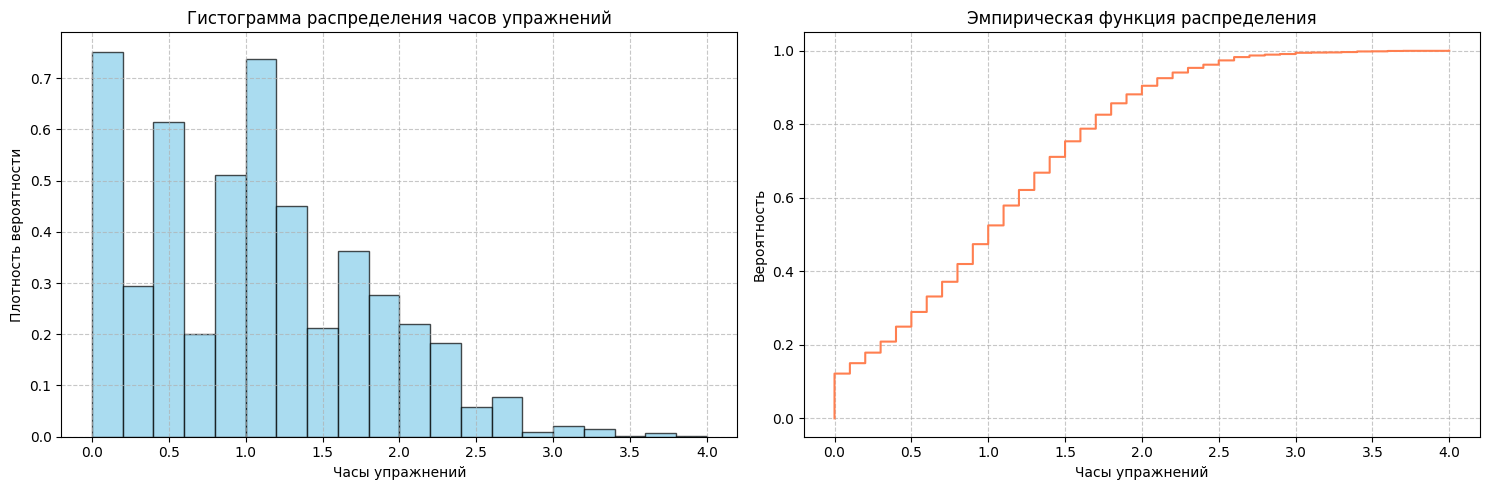

In [14]:
# Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. Гистограмма
ax1.hist(var16_np, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Гистограмма распределения часов упражнений')
ax1.set_xlabel('Часы упражнений')
ax1.set_ylabel('Плотность вероятности')
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. Эмпирическая функция распределения
sorted_data = np.sort(var16_np)
y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.step(sorted_data, y_vals, where='post', color='coral')
ax2.set_title('Эмпирическая функция распределения')
ax2.set_xlabel('Часы упражнений')
ax2.set_ylabel('Вероятность')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

II. ПРОВЕРКА НА НОРМАЛЬНОСТЬ
Хи-квадрат статистика: 570.3067
Критическое значение: 16.9190
Гипотеза нормальности (хи-квадрат): Отвергается
Гипотеза нормальности (асимметрия и эксцесс): Отвергается


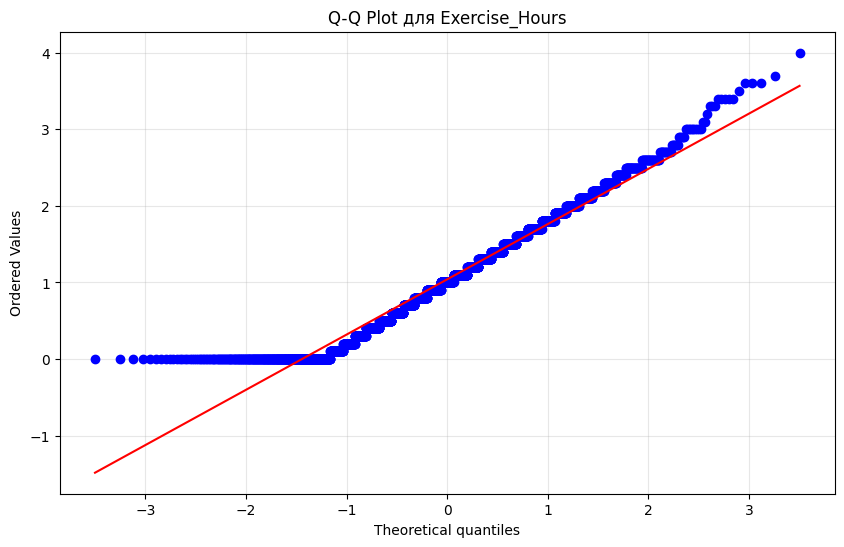


ОБЩИЙ ВЫВОД О НОРМАЛЬНОСТИ: Данные не нормальны


In [20]:
# II. Проверка на нормальность
print("="*50)
print("II. ПРОВЕРКА НА НОРМАЛЬНОСТЬ")
print("="*50)

# Критерий хи-квадрат (реализация вручную)
def chi_square_normality_test(data, alpha=0.05):
    n = len(data)
    k = int(1 + 3.322 * np.log10(n))  # Правило Старджеса для количества интервалов
    
    # Создание интервалов
    hist, bin_edges = np.histogram(data, bins=k, density=False)
    
    # Параметры нормального распределения
    mu, sigma = np.mean(data), np.std(data)
    
    # Ожидаемые частоты
    expected = []
    for i in range(len(bin_edges)-1):
        prob = norm.cdf(bin_edges[i+1], mu, sigma) - norm.cdf(bin_edges[i], mu, sigma)
        expected.append(prob * n)
    
    # Статистика хи-квадрат
    chi2_stat = 0
    for i in range(len(hist)):
        if expected[i] > 0:  # Избегаем деления на ноль
            chi2_stat += (hist[i] - expected[i])**2 / expected[i]
    
    # Степени свободы
    df = k - 3  # k интервалов минус 3 параметра (оценка среднего, стандартного отклонения и использование данных)
    
    # Критическое значение
    critical_value = stats.chi2.ppf(1 - alpha, df)
    
    return chi2_stat, critical_value, chi2_stat < critical_value

chi2_stat, critical_value, is_normal_chi2 = chi_square_normality_test(var16_np)
print(f"Хи-квадрат статистика: {chi2_stat:.4f}")
print(f"Критическое значение: {critical_value:.4f}")
print(f"Гипотеза нормальности (хи-квадрат): {'Не отвергается' if is_normal_chi2 else 'Отвергается'}")

# Критерий асимметрии и эксцесса
def skew_kurtosis_test(data, alpha=0.05):
    n = len(data)
    skewness = skew(data)
    kurt = kurtosis(data)
    
    # Стандартные ошибки
    se_skew = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
    se_kurt = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))
    
    # Z-статистики
    z_skew = skewness / se_skew
    z_kurt = kurt / se_kurt
    
    # Критические значения
    z_critical = stats.norm.ppf(1 - alpha/2)
    
    # Проверка гипотез
    skew_normal = abs(z_skew) < z_critical
    kurt_normal = abs(z_kurt) < z_critical
    
    return skew_normal and kurt_normal

is_normal_skew_kurt = skew_kurtosis_test(var16_np)
print(f"Гипотеза нормальности (асимметрия и эксцесс): {'Не отвергается' if is_normal_skew_kurt else 'Отвергается'}")

# Q-Q plot
plt.figure(figsize=(10, 6))
probplot(var16_np, dist="norm", plot=plt)
plt.title(f'Q-Q Plot для Exercise_Hours')
plt.grid(True, alpha=0.3)
plt.show()

# Общий вывод о нормальности
is_normal_overall = is_normal_chi2 and is_normal_skew_kurt
print(f"\nОБЩИЙ ВЫВОД О НОРМАЛЬНОСТИ: {'Данные нормальны' if is_normal_overall else 'Данные не нормальны'}")

Исходные данные: n=3000, Shapiro p-value: 0.9626


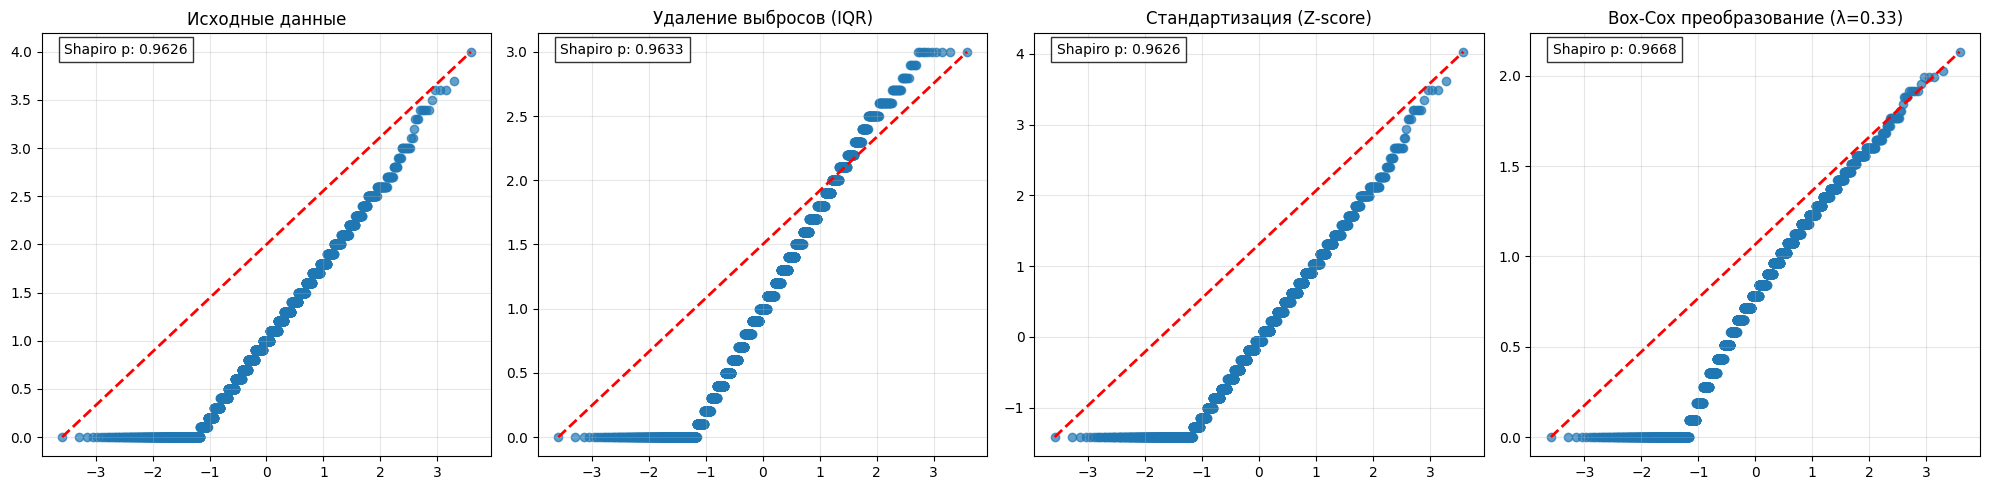


СРАВНИТЕЛЬНАЯ ТАБЛИЦА:
Метод				Shapiro p-value		Изменение
------------------------------------------------------------
Исходные            	0.962587		+0.000000
Без выбросов        	0.963267		+0.000680
Стандартизация      	0.962587		-0.000000
Box-Cox             	0.966816		+0.004228

Наилучший метод: Box-Cox (p-value: 0.966816)

Выбранные преобразованные данные: Box-Cox
Размер: 3000
Shapiro-Wilk p-value: 0.966816


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Исходные данные
original_data = var16_np.copy()
print(f"Исходные данные: n={len(original_data)}, Shapiro p-value: {stats.shapiro(original_data)[0]:.4f}")

# Создаем фигуру для сравнения
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()

# Функция для построения Q-Q plot
def plot_qq(data, ax, title):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    ranks = np.arange(1, n + 1)
    theoretical_probs = (ranks - 0.5) / n
    theoretical_quantiles = stats.norm.ppf(theoretical_probs)
    
    ax.scatter(theoretical_quantiles, sorted_data, alpha=0.7)
    x_range = np.array([theoretical_quantiles[0], theoretical_quantiles[-1]])
    y_range = np.array([sorted_data[0], sorted_data[-1]])
    ax.plot(x_range, y_range, 'r--', linewidth=2)
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    
    # Добавляем p-value Шапиро-Уилка
    shapiro_p = stats.shapiro(data)[0]
    ax.text(0.05, 0.95, f'Shapiro p: {shapiro_p:.4f}', 
            transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

# 0. Исходные данные
plot_qq(original_data, axes[0], 'Исходные данные')

# 1. УДАЛЕНИЕ ВЫБРОСОВ (метод IQR)
def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

data_no_outliers = remove_outliers_iqr(original_data)
plot_qq(data_no_outliers, axes[1], 'Удаление выбросов (IQR)')

# 2. СТАНДАРТИЗАЦИЯ (Z-score)
def standardize_data(data):
    return (data - np.mean(data)) / np.std(data)

data_standardized = standardize_data(original_data)
plot_qq(data_standardized, axes[2], 'Стандартизация (Z-score)')

# 3. ПРЕОБРАЗОВАНИЕ БОКСА-КОКСА
def box_cox_transform(data):
    # Box-Cox требует положительных значений
    if np.min(data) <= 0:
        data_positive = data - np.min(data) + 1
    else:
        data_positive = data
    
    # Находим оптимальный параметр λ
    transformed_data, lambda_val = stats.boxcox(data_positive)
    return transformed_data, lambda_val

try:
    data_boxcox, lambda_val = box_cox_transform(original_data)
    plot_qq(data_boxcox, axes[3], f'Box-Cox преобразование (λ={lambda_val:.2f})')
except Exception as e:
    axes[3].text(0.5, 0.5, f'Ошибка: {str(e)}', ha='center', va='center')
    axes[3].set_title('Box-Cox преобразование')

plt.tight_layout()
plt.show()

# Сравнительная таблица результатов
print("\nСРАВНИТЕЛЬНАЯ ТАБЛИЦА:")
print("Метод\t\t\t\tShapiro p-value\t\tИзменение")
print("-" * 60)
methods = [
    ("Исходные", original_data),
    ("Без выбросов", data_no_outliers),
    ("Стандартизация", data_standardized),
    ("Box-Cox", data_boxcox if 'data_boxcox' in locals() else original_data)
]

best_method = None
best_p_value = 0

for name, data in methods:
    try:
        shapiro_p, shapiro_stat = stats.shapiro(data)
        change = shapiro_p - stats.shapiro(original_data)[0]
        print(f"{name:20}\t{shapiro_p:.6f}\t\t{change:+.6f}")
        
        if shapiro_p > best_p_value:
            best_p_value = shapiro_p
            best_method = name
    except:
        print(f"{name:20}\tНе удалось вычислить")

print(f"\nНаилучший метод: {best_method} (p-value: {best_p_value:.6f})")

# Применяем лучший метод
if best_method == "Без выбросов":
    final_data = data_no_outliers
elif best_method == "Стандартизация":
    final_data = data_standardized
elif best_method == "Box-Cox":
    final_data = data_boxcox
else:
    final_data = original_data

print(f"\nВыбранные преобразованные данные: {best_method}")
print(f"Размер: {len(final_data)}")
print(f"Shapiro-Wilk p-value: {stats.shapiro(final_data)[0]:.6f}")

In [28]:
# 1. Среднее
print("Среднее:", final_data.mean())
# 2. Дисперсия
print("Дисперсия:", final_data.var())
# 3. Мода
mode_result = stats.mode(final_data)
print("Мода:", mode_result[0], "(встречается", mode_result[1], "раз)")
# 4. Медиана
print("Медиана:", np.median(final_data))
# 5. Квантили уровня 0.25, 0.5, 0.75
print("Квантили (0.25, 0.5, 0.75):", np.quantile(final_data, [0.25, 0.5, 0.75]))
# 6. Эксцесс
print("Эксцесс:", stats.kurtosis(final_data))
# 7. Асимметрия
print("Асимметрия:", stats.skew(final_data))
# 8. Интерквартильный размах
q75, q25 = np.percentile(final_data, [75, 25])
print("Интерквартильный размах:", q75 - q25)

Среднее: 0.7494349977103878
Дисперсия: 0.21457649476236354
Мода: 0.0 (встречается 366 раз)
Медиана: 0.7801168959479812
Квантили (0.25, 0.5, 0.75): [0.43425615 0.7801169  1.07227679]
Эксцесс: -0.7951686956777833
Асимметрия: -0.03514760201501022
Интерквартильный размах: 0.6380206379660627


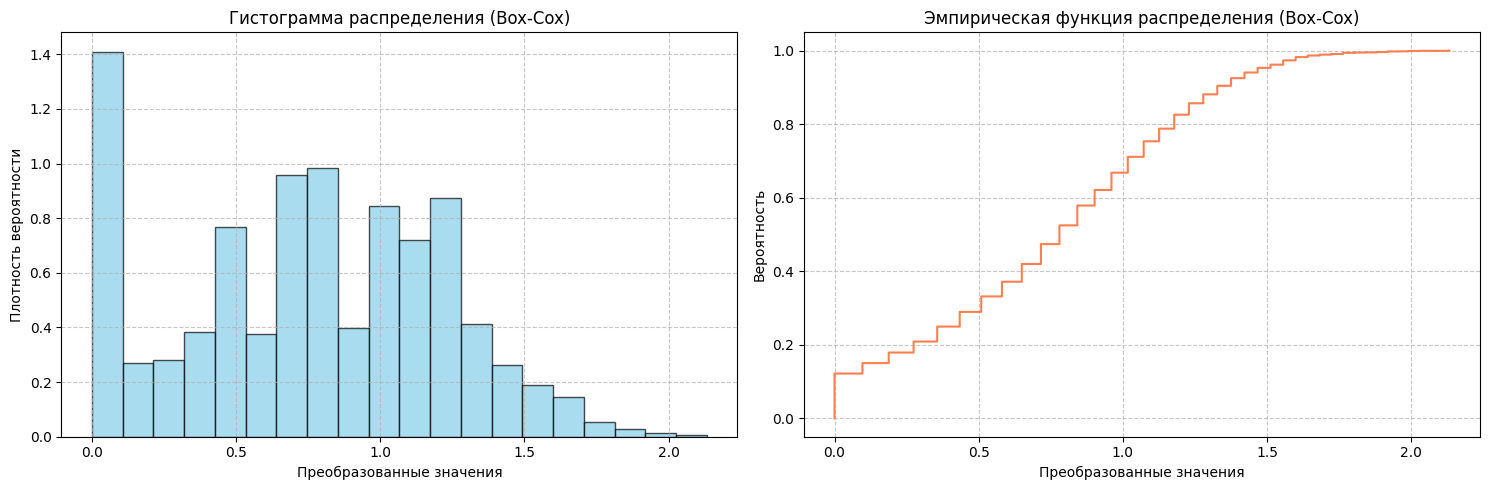

In [29]:
# Построение графиков для преобразованных данных
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. Гистограмма преобразованных данных
ax1.hist(final_data, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title(f'Гистограмма распределения ({best_method})')
ax1.set_xlabel('Преобразованные значения')
ax1.set_ylabel('Плотность вероятности')
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. Эмпирическая функция распределения для преобразованных данных
sorted_data = np.sort(final_data)
y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.step(sorted_data, y_vals, where='post', color='coral')
ax2.set_title(f'Эмпирическая функция распределения ({best_method})')
ax2.set_xlabel('Преобразованные значения')
ax2.set_ylabel('Вероятность')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [34]:
chi2_stat, critical_value, is_normal_chi2 = chi_square_normality_test(final_data)
print(f"Хи-квадрат статистика: {chi2_stat:.4f}")
print(f"Критическое значение: {critical_value:.4f}")
print(f"p-value: {best_p_value:.4f}")
print(f"Гипотеза нормальности (хи-квадрат): {'Не отвергается' if is_normal_chi2 else 'Отвергается'}")

Хи-квадрат статистика: 648.5481
Критическое значение: 16.9190
p-value: 0.9668
Гипотеза нормальности (хи-квадрат): Отвергается


In [35]:
grouped = df.groupby('School_Grade')
print(grouped.size())

School_Grade
10th    487
11th    479
12th    529
7th     497
8th     482
9th     526
dtype: int64


In [36]:
print(cols[N % 7])

Exercise_Hours


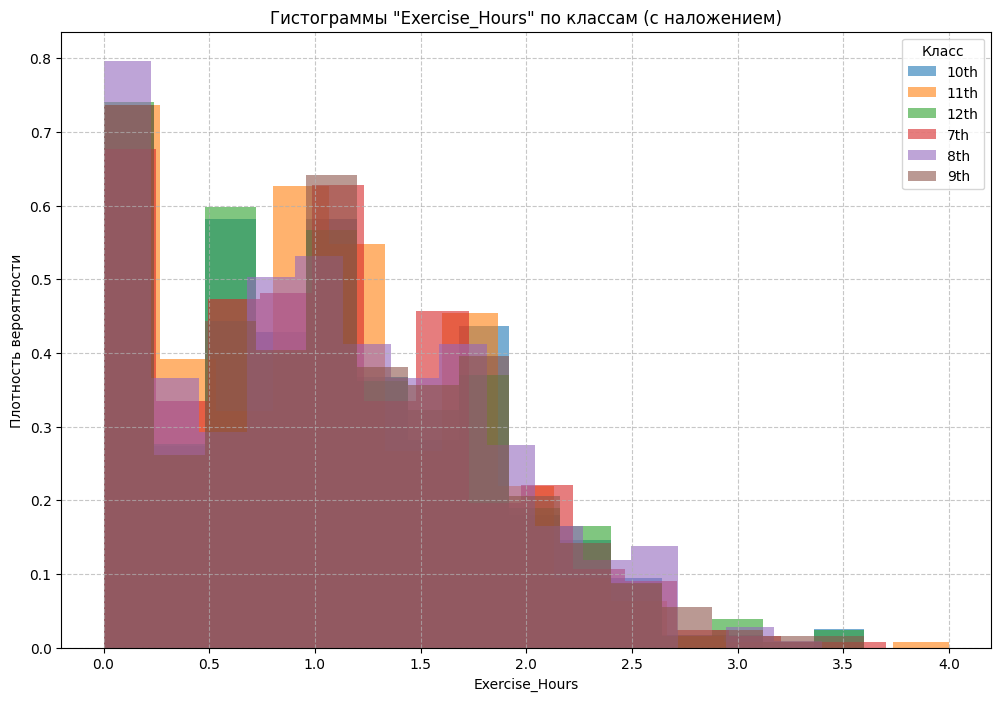

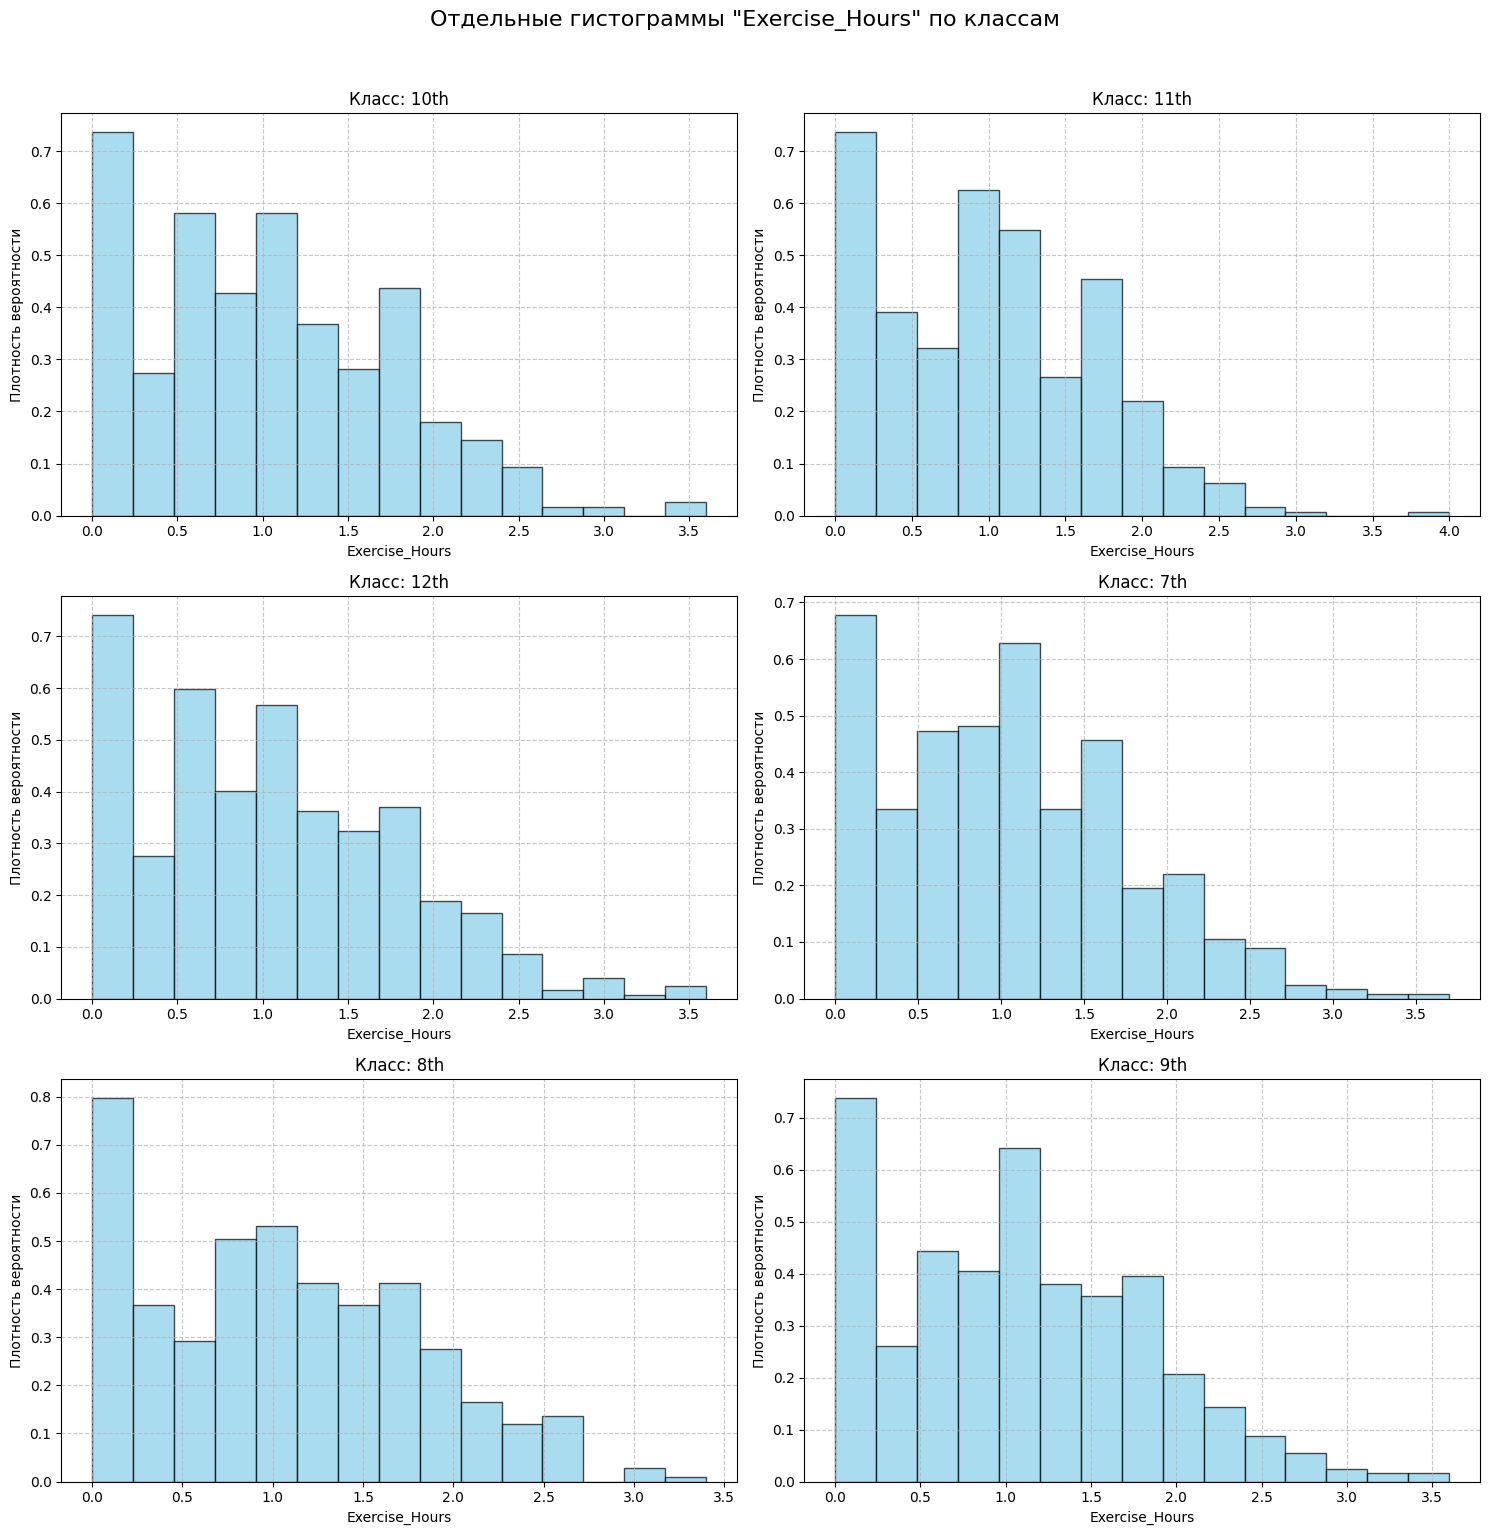


Среднее и дисперсия по группам:
                  mean       var
School_Grade                    
10th          1.042505  0.536523
11th          0.979541  0.486652
12th          1.045936  0.564155
7th           1.029577  0.532410
8th           1.062033  0.551674
9th           1.080228  0.561665


In [38]:
# Построение гистограмм для каждой группы на одном графике (с наложением)
fig, ax = plt.subplots(figsize=(12, 8))

# cols[N % 7] соответствует 'Exercise_Hours'
variable_to_plot = cols[N % 7]

for name, group in grouped:
    ax.hist(group[variable_to_plot], bins=15, density=True, alpha=0.6, label=name)

ax.set_title(f'Гистограммы "{variable_to_plot}" по классам (с наложением)')
ax.set_xlabel(variable_to_plot)
ax.set_ylabel('Плотность вероятности')
ax.legend(title='Класс')
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

# --- Начало добавленного кода ---

# Построение отдельных гистограмм для каждой группы
# Определяем количество групп для создания сетки графиков
num_groups = len(grouped)
# Создаем сетку 3x2 для 6 графиков
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
# Преобразуем массив осей в одномерный для удобства итерации
axes = axes.flatten()

for i, (name, group) in enumerate(grouped):
    ax = axes[i]
    ax.hist(group[variable_to_plot], bins=15, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Класс: {name}')
    ax.set_xlabel(variable_to_plot)
    ax.set_ylabel('Плотность вероятности')
    ax.grid(True, linestyle='--', alpha=0.7)

# Если количество групп нечетное, удаляем последний пустой график
if num_groups < len(axes):
    for j in range(num_groups, len(axes)):
        fig.delaxes(axes[j])

plt.suptitle(f'Отдельные гистограммы "{variable_to_plot}" по классам', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# --- Конец добавленного кода ---


# Расчет среднего и дисперсии для каждой группы (остается без изменений)
group_stats = grouped[variable_to_plot].agg(['mean', 'var'])
print("\nСреднее и дисперсия по группам:")
print(group_stats)